In [39]:
import pandas as pd
import numpy as np

In [40]:
df1 = pd.read_csv("properties_data.csv")
df1.shape

(1905, 38)

In [41]:
pd.set_option('display.max_columns',38)
df1.head(10)

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
5,6356784,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
6,6356790,Palm Jumeirah,25.114275,55.139764,8503600,2062,4123.96,2,3,High,True,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True
7,6356797,Palm Jumeirah,25.114275,55.139764,3119900,1015,3073.79,1,2,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
8,6376886,Palm Jumeirah,25.106668,55.149275,2100000,2186,960.66,3,3,Low,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,6406935,Downtown Dubai,25.194935,55.282665,2690000,1521,1768.57,2,3,Medium,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False


Drop the columns that does not contribute to price estimation <br>
In this data there is "id","latitude","longitude" columns, as id are not required for prediction and latitude and longitude are of no use since we already have the "neighborhood" column

In [42]:
df2 = df1.drop(['id','latitude','longitude'],axis='columns')
df2.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,False,False,True,True,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,Palm Jumeirah,2850000,1582,1801.52,2,2,Medium,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,Medium,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True
3,Culture Village,2850000,2020,1410.89,2,3,Low,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False


Check if there's any null values. If present then we can either drop them (dropna) or fill with median values (fillna)

In [43]:
df2.isnull().sum() 

neighborhood           0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [44]:
df2['no_of_bedrooms'].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

If the no. of bedrooms are 0 it can either be studio aparatment or maybe a shop. <br>
If there are any shops then I need to drop those rows since this is for house prediction. A studio apartment is usually small in size with only 1 attached bathroom.<br>
Hence if the size is too big or there are more than 1 bathroom then it cannot be a studio apartment 

In [45]:
df2[df2['no_of_bedrooms'] == 0]

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,False
42,Palm Jumeirah,1050000,549,1912.57,0,1,Low,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
49,DAMAC Hills,365000,451,809.31,0,1,Medium,False,True,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
55,Jumeirah Lake Towers,375000,450,833.33,0,1,Medium,False,True,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,True,True,False
111,Business Bay,610000,458,1331.88,0,1,Low,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,Jumeirah Lake Towers,400888,415,966.00,0,1,High,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False
1845,Jumeirah Village Circle,443850,422,1051.78,0,1,Medium,False,True,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1848,Dubai Residence Complex,270000,460,586.96,0,1,Low,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1857,Jumeirah Lake Towers,400888,403,994.76,0,1,Medium,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False


In [46]:
df2[(df2['no_of_bedrooms'] == 0) & (df2['size_in_sqft'] > 800)] # Studio Apartments

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
774,Downtown Dubai,1200000,827,1451.03,0,1,Medium,False,True,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1103,Motor City,460000,809,568.60,0,1,Medium,False,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [47]:
df2[(df2['no_of_bedrooms'] == 0) & (df2['no_of_bathrooms'] > 1)] # These cannot be studio apartments

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
139,Dubai Marina,850000,545,1559.63,0,2,Medium,False,False,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,False,False
532,Dubai Sports City,429000,460,932.61,0,2,Low,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
933,Jumeirah Lake Towers,500000,532,939.85,0,2,Medium,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False


In [48]:
df3 = df2.drop(df2[(df2['no_of_bedrooms'] == 0) & (df2['no_of_bathrooms'] > 1)].index)
df3.shape

(1902, 35)

Its also unusual if the no. of bathrooms are 2 more than the no. of bedrooms

In [49]:
df3[df3['no_of_bathrooms'] > df3['no_of_bedrooms']+2]

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
403,Palm Jumeirah,2499000,1367,1828.09,2,5,Low,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
799,Dubai Marina,3950000,3882,1017.52,3,6,Low,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
df4 = df3.drop(df3[df3['no_of_bathrooms'] > df3['no_of_bedrooms']+2].index)
df4.shape

(1900, 35)

In [51]:
df4['price_per_sqft'].describe()

count    1900.000000
mean     1327.432479
std       669.074986
min       361.870000
25%       870.292500
50%      1169.820000
75%      1622.842500
max      4805.870000
Name: price_per_sqft, dtype: float64

In [52]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('neighborhood'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(1363, 35)

<Axes: title={'center': 'After Removing Outliers'}, xlabel='size_in_sqft', ylabel='price'>

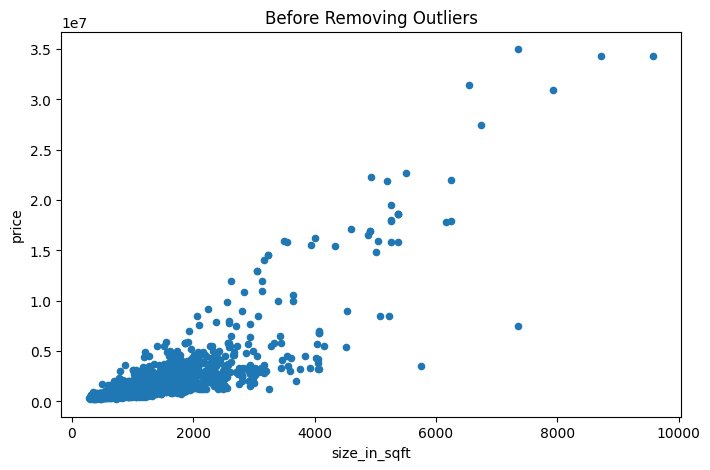

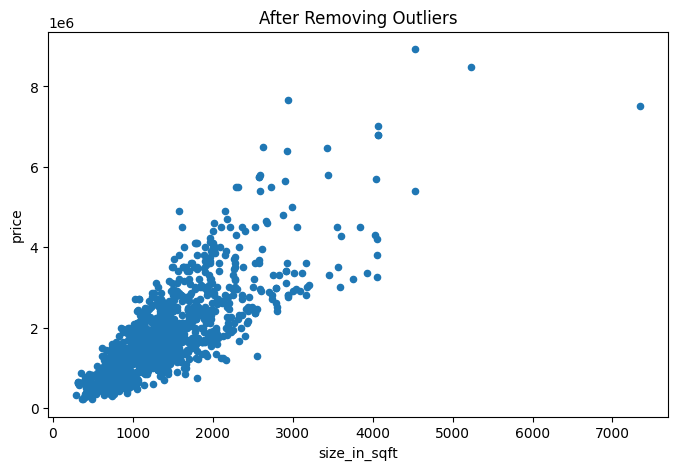

In [53]:
df4.plot(x='size_in_sqft',y='price',kind='scatter',figsize=(8,5),title="Before Removing Outliers")
df5.plot(x='size_in_sqft',y='price',kind='scatter',figsize=(8,5),title="After Removing Outliers")

Now I can drop price_per_sqft column as its no longer needed

In [54]:
df6 = df5.drop(['price_per_sqft'],axis='columns')
df6.shape

(1363, 34)

In [55]:
dummies1 = pd.get_dummies(df6['neighborhood'])
dummies1.head()

,Al Barari,Al Barsha,Al Furjan,Al Kifaf,Al Sufouh,Arjan,Barsha Heights (Tecom),Bluewaters,Business Bay,City Walk,Culture Village,DAMAC Hills,DIFC,Discovery Gardens,Downtown Dubai,Dubai Creek Harbour (The Lagoons),Dubai Festival City,Dubai Harbour,Dubai Healthcare City,...,Jumeirah,Jumeirah Beach Residence,Jumeirah Golf Estates,Jumeirah Lake Towers,Jumeirah Village Circle,Jumeirah Village Triangle,Meydan,Mirdif,Mohammed Bin Rashid City,Motor City,Mudon,Old Town,Palm Jumeirah,Remraam,The Hills,The Views,Town Square,Umm Suqeim,World Trade Center
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
len(df6['neighborhood'].unique())

50

In [57]:
dummies2 = pd.get_dummies(df6['quality'])
dummies2.head()

,High,Low,Medium,Ultra
0,False,False,True,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [58]:
df7 = pd.concat([df6,dummies1.drop('World Trade Center',axis='columns')],axis='columns')
df7.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,...,Jebel Ali,Jumeirah,Jumeirah Beach Residence,Jumeirah Golf Estates,Jumeirah Lake Towers,Jumeirah Village Circle,Jumeirah Village Triangle,Meydan,Mirdif,Mohammed Bin Rashid City,Motor City,Mudon,Old Town,Palm Jumeirah,Remraam,The Hills,The Views,Town Square,Umm Suqeim
0,Al Barari,4500000,3845,3,4,Medium,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Al Barari,3350000,3017,2,3,Low,False,True,True,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Al Barari,2700000,2745,2,3,Low,False,True,False,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Al Barari,2100000,1917,1,1,Low,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Al Barari,2300000,1915,2,2,Low,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
df8 = pd.concat([df7,dummies2.drop('Ultra',axis='columns')],axis='columns')
df8.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,...,Jumeirah Golf Estates,Jumeirah Lake Towers,Jumeirah Village Circle,Jumeirah Village Triangle,Meydan,Mirdif,Mohammed Bin Rashid City,Motor City,Mudon,Old Town,Palm Jumeirah,Remraam,The Hills,The Views,Town Square,Umm Suqeim,High,Low,Medium
0,Al Barari,4500000,3845,3,4,Medium,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Al Barari,3350000,3017,2,3,Low,False,True,True,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Al Barari,2700000,2745,2,3,Low,False,True,False,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,Al Barari,2100000,1917,1,1,Low,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,Al Barari,2300000,1915,2,2,Low,False,True,True,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [60]:
df9 = df8.drop(['neighborhood','quality'],axis='columns')
df9.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,...,Jumeirah Golf Estates,Jumeirah Lake Towers,Jumeirah Village Circle,Jumeirah Village Triangle,Meydan,Mirdif,Mohammed Bin Rashid City,Motor City,Mudon,Old Town,Palm Jumeirah,Remraam,The Hills,The Views,Town Square,Umm Suqeim,High,Low,Medium
0,4500000,3845,3,4,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,3350000,3017,2,3,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2700000,2745,2,3,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2100000,1917,1,1,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,2300000,1915,2,2,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [61]:
X = df9.drop(['price'],axis='columns')
X.head()

,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,...,Jumeirah Golf Estates,Jumeirah Lake Towers,Jumeirah Village Circle,Jumeirah Village Triangle,Meydan,Mirdif,Mohammed Bin Rashid City,Motor City,Mudon,Old Town,Palm Jumeirah,Remraam,The Hills,The Views,Town Square,Umm Suqeim,High,Low,Medium
0,3845,3,4,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,3017,2,3,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2745,2,3,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,1917,1,1,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1915,2,2,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [62]:
y = df9['price']
y.head()

0    4500000
1    3350000
2    2700000
3    2100000
4    2300000
Name: price, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8278167551588771

In [67]:
X.columns

Index(['size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'maid_room',
       'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes',
       'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge',
       'covered_parking', 'kitchen_appliances', 'lobby_in_building',
       'maid_service', 'networked', 'pets_allowed', 'private_garden',
       'private_gym', 'private_jacuzzi', 'private_pool', 'security',
       'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant',
       'view_of_landmark', 'view_of_water', 'walk_in_closet', 'Al Barari',
       'Al Barsha', 'Al Furjan', 'Al Kifaf', 'Al Sufouh', 'Arjan',
       'Barsha Heights (Tecom)', 'Bluewaters', 'Business Bay', 'City Walk',
       'Culture Village', 'DAMAC Hills', 'DIFC', 'Discovery Gardens',
       'Downtown Dubai', 'Dubai Creek Harbour (The Lagoons)',
       'Dubai Festival City', 'Dubai Harbour', 'Dubai Healthcare City',
       'Dubai Hills Estate', 'Dubai Land', 'Dubai Marina',
       'Dubai

In [68]:
def predict_price(location,size_in_sqft, no_of_bedrooms, no_of_bathrooms, maid_room,
       unfurnished, balcony, barbecue_area, built_in_wardrobes,
       central_ac, childrens_play_area, childrens_pool, concierge,
       covered_parking, kitchen_appliances, lobby_in_building,
       maid_service, networked, pets_allowed, private_garden,
       private_gym, private_jacuzzi, private_pool, security,
       shared_gym, shared_pool, shared_spa, study, vastu_compliant,
       view_of_landmark, view_of_water, walk_in_closet,High,Medium,Low,Ultra):
    
    try:
        loc_index = np.where(X.columns == location)[0][0]
    except IndexError:
        raise ValueError(f"Location {location} not found in model features")

    x = np.zeros(len(X.columns))
    
    # Assigning feature values to the corresponding columns
    x[0] = size_in_sqft
    x[1] = no_of_bedrooms
    x[2] = no_of_bathrooms
    x[3] = maid_room
    x[4] = unfurnished
    x[5] = balcony
    x[6] = barbecue_area
    x[7] = built_in_wardrobes
    x[8] = central_ac
    x[9] = childrens_play_area
    x[10] = childrens_pool
    x[11] = concierge
    x[12] = covered_parking
    x[13] = kitchen_appliances
    x[14] = lobby_in_building
    x[15] = maid_service
    x[16] = networked
    x[17] = pets_allowed
    x[18] = private_garden
    x[19] = private_gym
    x[20] = private_jacuzzi
    x[21] = private_pool
    x[22] = security
    x[23] = shared_gym
    x[24] = shared_pool
    x[25] = shared_spa
    x[26] = study
    x[27] = vastu_compliant
    x[28] = view_of_landmark
    x[29] = view_of_water
    x[30] = walk_in_closet
    x[31] = High
    x[32] = Medium
    x[33] = Low
    x[34] = Ultra
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    return model.predict([x])[0]

In [69]:
predicted_price = predict_price("Jumeirah Village Circle", 2500, 5, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,0,0,0,1)
print(f"The predicted price is: {predicted_price}")

The predicted price is: 3524943.9792327126


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
predicted_price = predict_price("Downtown Dubai", 2500, 5, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,0,0,0,1)
print(f"The predicted price is: {predicted_price}")

The predicted price is: 4359647.035134031


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
predicted_price = predict_price("Downtown Dubai", 1521, 2, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,0,0,1,0,0)
print(f"The predicted price is: {predicted_price}")

The predicted price is: 2662314.660264207


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
